In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt  #Пакет для построения графиков и прочего

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>«Статистическая проверка гипотез для связанных выборок. A/B тесты и как их проводить»</b></h3>


In [3]:
import pandas as pd  # Подгрузим пакет 

df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t") # Подгрузим данные

# изменим формат  данных, подходящего для пакета statsmodels
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
 

df_melt.columns = ['index', 'treatments', 'value'] # заменяем имена столбцов
print(df_melt)

    index treatments  value
0       0          A     25
1       1          A     30
2       2          A     28
3       3          A     36
4       4          A     29
5       0          B     45
6       1          B     55
7       2          B     29
8       3          B     56
9       4          B     40
10      0          C     30
11      1          C     29
12      2          C     33
13      3          C     37
14      4          C     27
15      0          D     54
16      1          D     60
17      2          D     51
18      3          D     62
19      4          D     73


**Получаем коробчатую диаграмму, чтобы увидеть распределение данных по группам.** 

**Используя коробчатую диаграмму, мы можем легко обнаружить различия между разными методами лечения**

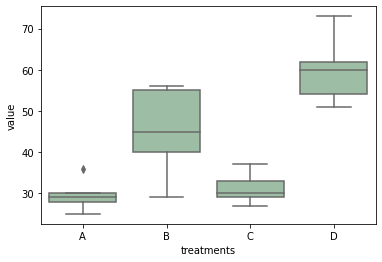

In [29]:
import seaborn as sns  # Еще дна библиотека для визуализации данных, но более продвинутая
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
#ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [5]:
import scipy.stats as stats
# Функция f_oneway принимает группы в качестве входных данных и возвращает значения F и P
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

17.492810457516338 2.639241146210922e-05


### Начнем с датасета про морских гребешков

In [6]:
abalone = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/abalone.csv'
data = pd.read_csv(abalone, error_bad_lines=False)
data.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [7]:
half = len(data['Length']) // 2 

sam1 = data.loc[half:, 'Length'] # Берем первую половину данных
sam2 = data.loc[:half, 'Length'] # Берем вторую половину данных

stats.ttest_ind(sam2, sam1) # применяем тест Стьюдента. 

Ttest_indResult(statistic=-1.5812897200356624, pvalue=0.11388753958977987)

In [8]:
stats.ttest_ind(df['A'],  df['C'])

Ttest_indResult(statistic=-0.6374552583116757, pvalue=0.541638025048848)

# Дисперсионный анализ и датасет про раковины

<div class="alert alert-info">
Вот некоторые данные об измерении раковины (длина рубца передней приводящей мышцы, стандартизированная путем деления на длину) у мидии Mytilus trossulus из пяти мест: 
Тилламук, Орегон; Ньюпорт, Орегон; Петербург, Аляска; Магадан, Россия и Tvarminne, Финляндия.
</div>

In [9]:
from scipy.stats import f_oneway # импортирем функцию для дисперсионного анализа из библиотеки scipy пакета stats

# Берем несколько выборок с размерами раковин разных видов
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835,0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

F, p = f_oneway(tillamook, newport, petersburg, magadan, tvarminne)  # дисперсионный анализ (ДА) в python

alpha = 0.05   # Уровень значимости
print(F, p)  # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

7.121019471642447 0.0002812242314534544
Разное распределение (отклоняем H0)


**Можете привести пример когда выборки зависимы, а когда нет ?**

# Критерием Манна-Уитни

In [10]:
# Тест Вилкоксона для независимых выборок также называется критерием Манна-Уитни

from scipy.stats import mannwhitneyu # Импортируем нужный тест из пакета scipy
 
# Генерируем две независимых выборки
group =  [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]  # Некий общий элемент
group_1 = group
group_2 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]
 


# Сравнение групп

stat, p = mannwhitneyu(group_1, group_2) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))


# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=50.000, p=0.106
Одинаковые распределения (не отвергаем H0)


In [11]:
np.mean(group_1), np.mean(group_2)

(21.0, 22.75)

In [12]:
#pd.DataFrame(group_1).hist()
#pd.DataFrame(group_2).hist()

**Какие выборки зависимы? Приведите пример**

# Критерий Уилкоксона  

In [13]:
 

from scipy.stats import wilcoxon  # Wilcoxon signed-rank test
 

group =  [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]  # Некий общий элемент

group_1 = group + group 

group_2 = group + [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]

group_3 = group + [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 18] # отличие только в одном элементе

import scipy.stats as stats

#Выполняем the Wilcoxon-Signed Rank Test
 

stat, p = wilcoxon(group_1, group_2)
#stat, p = wilcoxon(group_1, group_3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=10.500, p=0.044
Разные распределения (отвергаем H0)


C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2958: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [14]:
  
#pd.DataFrame(group_1).hist()
#pd.DataFrame(group_2).hist()    

# Задания для самостоятельного решения

**Замечание:** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

<div class="alert alert-info">
<b>Задание № 1</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [15]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

from scipy.stats import mannwhitneyu

In [16]:
stat, p = mannwhitneyu(group_1, group_2) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=244.000, p=0.183
Одинаковые распределения (не отвергаем H0)


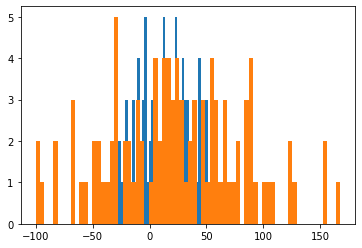

In [17]:
plt.hist(A, bins=70); #Выборка A
plt.hist(B, bins=70);  #Выборка B

# Вывод:
1. Т.к. р больше 0,5, то подтверждаем что выборки одинаковые. Значит различие между препаратами нет.

<div class="alert alert-info">
<b>Задание № 2</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [18]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

from scipy.stats import wilcoxon

In [19]:
stat, p = wilcoxon(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.5:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=1930.000, p=0.041
Разные распределения (отвергаем H0)


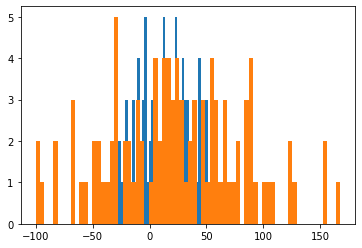

In [20]:
plt.hist(A, bins=70); #Выборка A
plt.hist(B, bins=70);  #Выборка B

# Вывод:
1. р меньше 0,5 распредения разные, значит отличие между группами есть
2. Ничего не понимаю, грфики в зад №1 и №2 одинаковые. Значения А и В в заданиях одинаковые. Не понимаю как на одних и тех же данных можно получить два разных результата? Видимо тесты по разному работатют.

<div class="alert alert-info">
<b>Задание № 3</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

In [21]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

from scipy.stats import f_oneway # импортирем функцию для дисперсионного анализа из библиотеки scipy пакета stats

In [22]:
F, p = f_oneway(nutri, mineral)  # дисперсионный анализ (ДА) в python

alpha = 0.05   # Уровень значимости
print(F, p)  # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

18.128724672228838 0.0001213673340124552
Разное распределение (отклоняем H0)


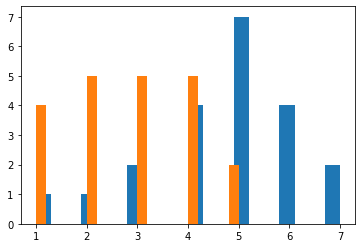

In [38]:
plt.hist(nutri, bins=20); #Выборка A
plt.hist(mineral, bins=20);  #Выборка B

# Вывод:
1. Распределение разное
2. Эффекта от удобрения есть

# Cookie Cats

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=400></p>
 

<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=400></p>


# Данные A/B тестирования

In [99]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

`userid` - уникальный номер, идентифицирующий каждого игрока.

версия - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

`sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки

`retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?

`retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиция для подтверждения ваших выводом. 
</div>

In [40]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


# Вывод:
1. Количество игроков установивших игру с gate_40 в выборках больче чем с gate_30
2. Других выводов не сделать

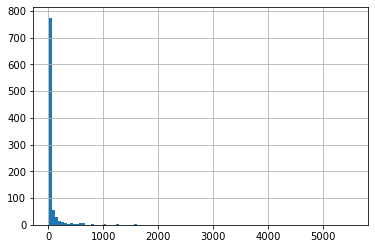

In [85]:
# Подсчет количества игроков для каждого количества раундов
plot_df = data.groupby('sum_gamerounds')['userid'].count()
plot_df.hist(bins=100)  # попробуйте поварировать параметр bins

# Вывод:
1. Больше всего играют небольшое количество раундов
2. Определить по визиализации сколько игроков играет до 30 или 40 уровня невозможно.

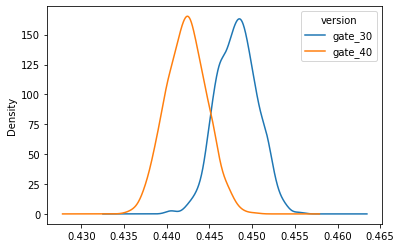

In [220]:
## Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_1'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# # Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# # A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

# Вывод:
1. Видно, что в среднем удержание игроков после одного дня выше когда ворота на 30 уровне.
2. Подобная тендеция показывает и возвращение игроков после 7 дней, но уже с меньшей вероятностью.

#### Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот.

In [221]:
from scipy.stats import f_oneway 
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

data_30 = list(boot_1d.loc[:, 'gate_30'])
data_40 = list(boot_1d.loc[:, 'gate_40'])

stat, p = wilcoxon(data_30, data_40)
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.5:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=3460.000, p=0.000
Разные распределения (отвергаем H0)


In [222]:
stat, p = mannwhitneyu(data_30, data_40) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=37928.000, p=0.000
Разные распределения (отвергаем H0)


In [223]:
F, p = f_oneway(data_30, data_40)  # дисперсионный анализ (ДА) в python

alpha = 0.05   # Уровень значимости
print(F, p)  # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

3157.7772357257204 0.0
Разное распределение (отклоняем H0)


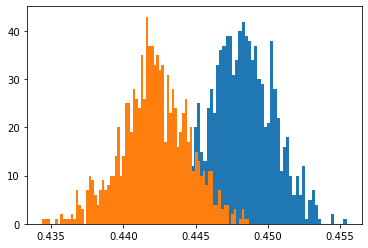

In [211]:
plt.hist(data_30, bins=80); #Выборка A
plt.hist(data_40, bins=80);  #Выборка B

**Ваши выводы?** 
1. Тесты я провел провел, все которык вы показали, но именно в этой задаче не понимаю как их трактовать.

**Ваши выводы?** 
1. При сдвиге ворот на уровень 40, проигравшие реже возвращаются. Сдвиг не оправдан.